In [1]:
import numpy as np
import matplotlib.pyplot as plt

KMeans

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,random_state=7)
k=5
kmeans = KMeans(n_clusters=k, n_init=10,random_state=42)
y_pred = kmeans.fit_predict(X)

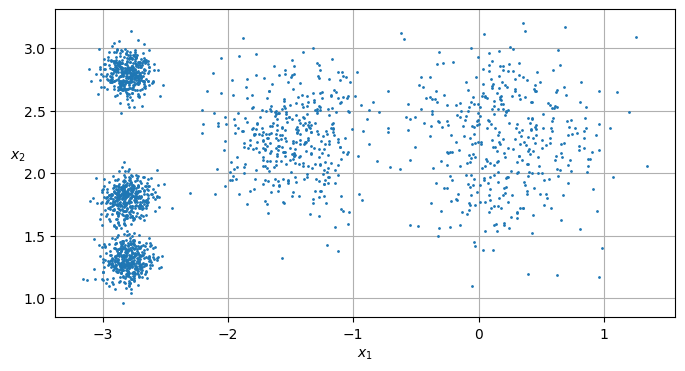

In [3]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

In [4]:
kmeans.labels_

array([0, 0, 4, ..., 3, 1, 0], dtype=int32)

In [5]:
y_pred

array([0, 0, 4, ..., 3, 1, 0], dtype=int32)

In [6]:
y_pred is kmeans.labels_

True

In [7]:
kmeans.cluster_centers_

array([[-2.80214068,  1.55162671],
       [ 0.08703534,  2.58438091],
       [-1.46869323,  2.28214236],
       [-2.79290307,  2.79641063],
       [ 0.31332823,  1.96822352]])

In [8]:
kmeans.inertia_

219.42800073647606

In [9]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([4, 4, 3, 3], dtype=int32)

KMeans class, the
transform() method measures the distance from each instance to every
centroid:


In [10]:
kmeans.transform(X=X_new).round(2)

array([[2.84, 0.59, 1.5 , 2.9 , 0.31],
       [5.82, 2.97, 4.48, 5.85, 2.69],
       [1.46, 3.11, 1.69, 0.29, 3.47],
       [0.97, 3.09, 1.55, 0.36, 3.36]])

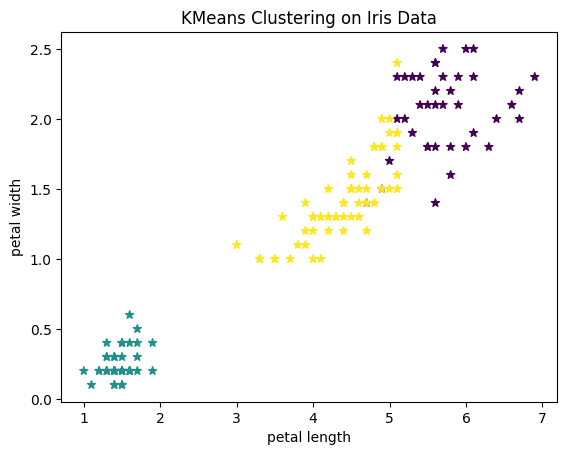

In [11]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data

iris_kmeans = KMeans(n_clusters=3, random_state=42)
iris_y_pred = iris_kmeans.fit_predict(X)


plt.scatter(X[:, 2], X[:, 3], c=iris_kmeans.labels_,marker='*', cmap='viridis')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('KMeans Clustering on Iris Data')
plt.show()

In [12]:
iris_y_pred is iris_kmeans.labels_

True

How to find optimal number of cluster in kmeans

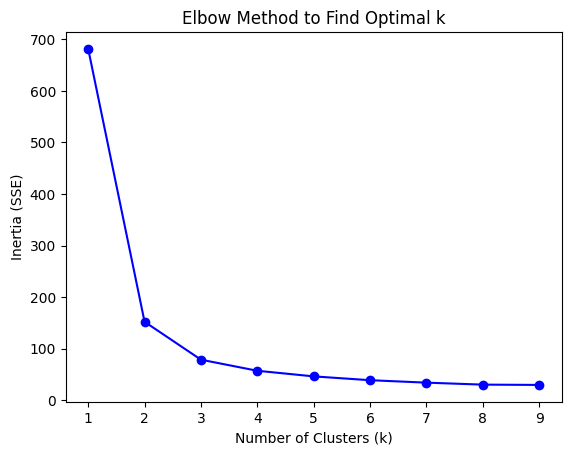

In [13]:
# Generate synthetic dataset
iris = load_iris()
X = iris.data

inertia_values = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)  # Sum of squared distances

# Plot the elbow curve
plt.plot(k_values, inertia_values, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method to Find Optimal k')
plt.show()


Silhouette Score

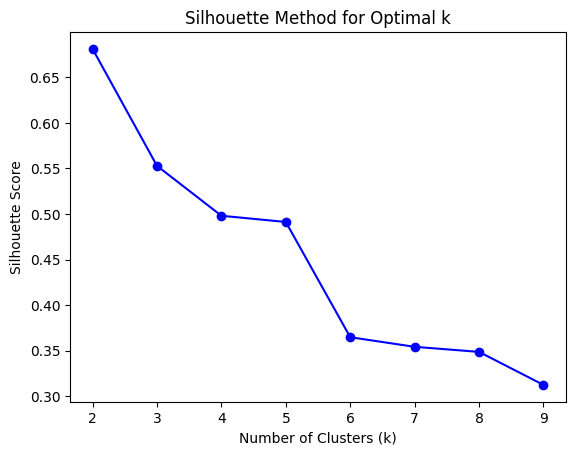

In [14]:
from sklearn.metrics import silhouette_score


kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
                for k in range(1, 10)]
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k,random_state=42)
#     labels = kmeans.fit_predict(X)
#     score = silhouette_score(X, labels)
#     silhouette_scores.append(score)


plt.plot(range(2, 10), silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()


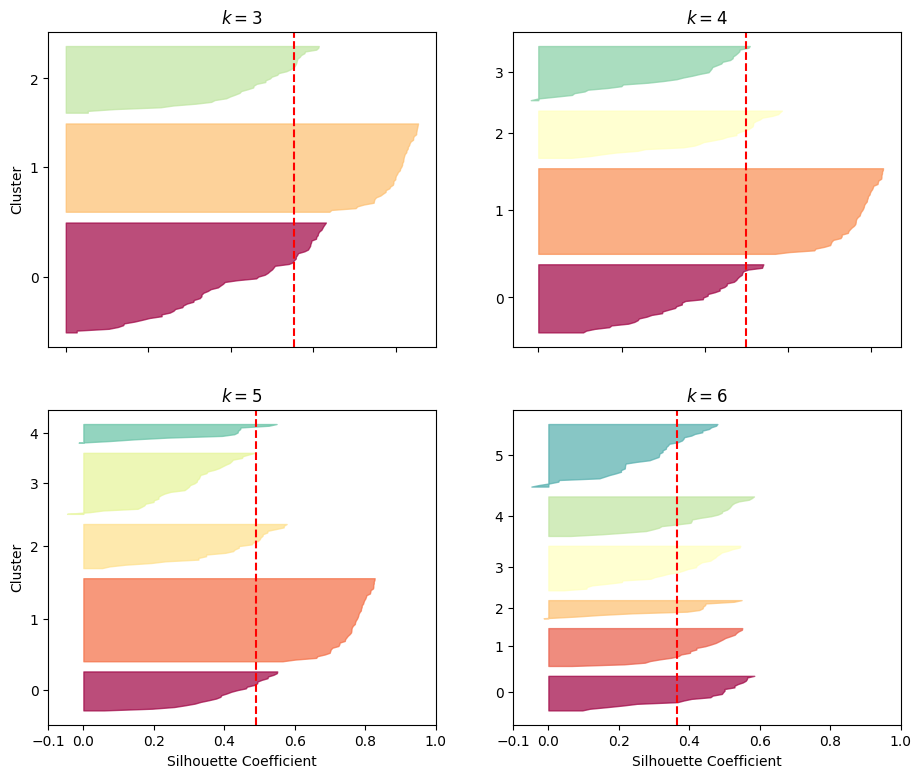

In [15]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.show()

In [16]:
best_k = range(2, 10)[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters based on silhouette score: {best_k}")

Optimal number of clusters based on silhouette score: 2


Mini Batch KMeans

In [17]:
from sklearn.cluster import MiniBatchKMeans

mini_batch_kmeans = MiniBatchKMeans(n_clusters=3, random_state=42)
mini_batch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=3, random_state=42)

In [18]:
X_new = np.array([[2.2, 1.5, 2.4, 0.2],
       [4.1, 3. , 1.1, 0.1]])
mini_batch_kmeans.predict(X_new)

array([0, 0], dtype=int32)

KMeans for Image Segmentation